In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [4]:
df=pd.read_csv('./../P5_Diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
X=df.drop(['Outcome'],axis=1)

In [8]:
y=df['Outcome']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [23]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [45]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [46]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
y_pred=clf.predict(X_test)

In [48]:
accuracy_score(y_pred,y_test)

0.7597402597402597

In [49]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

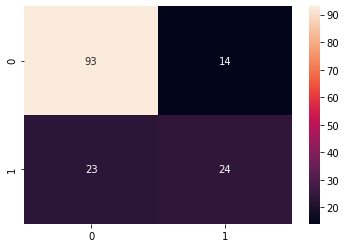

In [50]:
sns.heatmap(cm,annot=True)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



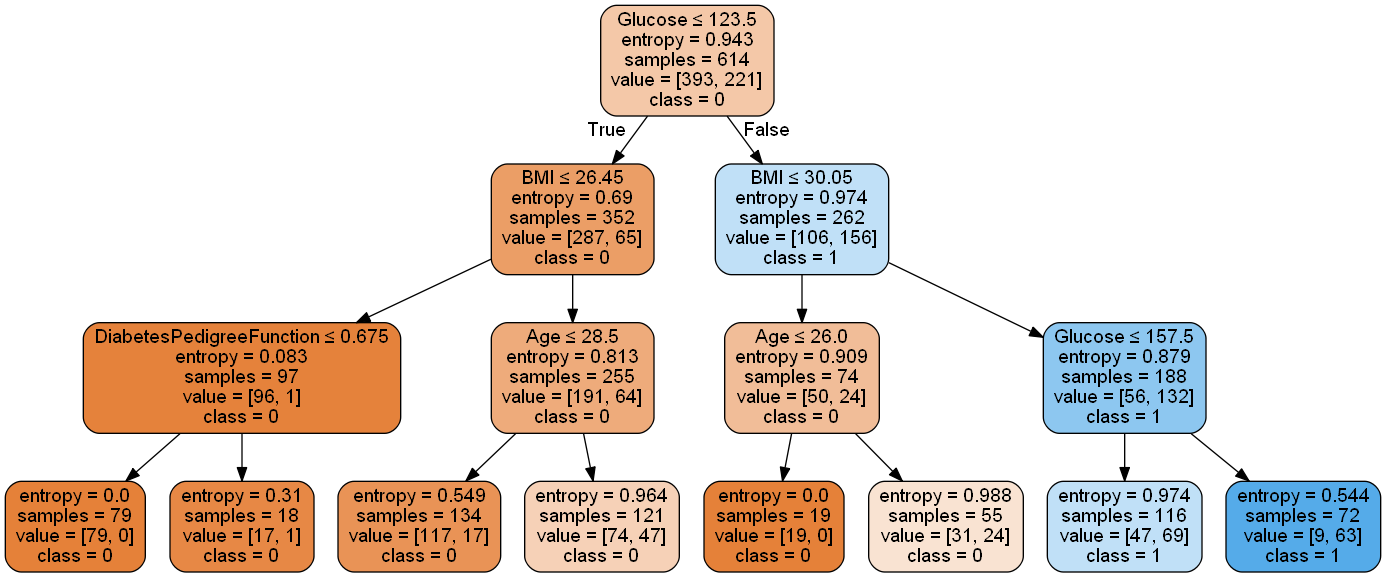

In [52]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('d.png')
Image(graph.create_png())

In [173]:
df1=pd.read_csv('Narcotics_Dataset.csv')

In [174]:
df1.head()

,SL\nNo.,DATE OF\nSEIZURE,SEIZING\nAGENCY,QUANTITY AND\nDRUG SEIZED\n(IN KGS.),PLACE\nOF\nORIGIN,INTENDED\nDESTINAT\nION,NAME OF\nPERSONS ARRESTED,NATION-\nALITY,AGE,SEX
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-


In [175]:
df1.shape

(210, 10)

In [176]:
df1.columns

Index(['SL\nNo.', 'DATE OF\nSEIZURE', 'SEIZING\nAGENCY',
       'QUANTITY AND\nDRUG SEIZED\n(IN KGS.)', 'PLACE\nOF\nORIGIN',
       'INTENDED\nDESTINAT\nION', 'NAME OF\nPERSONS ARRESTED',
       'NATION-\nALITY', 'AGE', 'SEX'],
      dtype='object')

In [177]:
df1.columns=['Sl_No.', 'DATE_OF_SEIZURE', 'SEIZING_AGENCY',
       'QUANTITY_AND_DRUG SEIZED', 'PLACE_OF_ORIGIN',
       'INTENDED_DESTINATION', 'NAME_OF_PERSONS_ARRESTED',
       'NATIONALITY', 'AGE', 'SEX']

In [178]:
df1.isna().sum()

Sl_No.                      164
DATE_OF_SEIZURE             165
SEIZING_AGENCY              162
QUANTITY_AND_DRUG SEIZED    161
PLACE_OF_ORIGIN             167
INTENDED_DESTINATION        167
NAME_OF_PERSONS_ARRESTED    140
NATIONALITY                 140
AGE                         140
SEX                         140
dtype: int64

In [179]:
df1['SEX'].unique()

array(['M\nM', '-', 'M', 'F', 'M\nM\nM\nM', nan], dtype=object)

In [180]:
df1['SEX'].replace({'M\nM':'M' , 'M\nM\nM\nM':'M','-':'N',np.NaN:'N'},inplace=True)

In [181]:
df1['SEX'].unique()

array(['M', 'N', 'F'], dtype=object)

In [182]:
df1.rename(columns={'SEX':'gender'})

,Sl_No.,DATE_OF_SEIZURE,SEIZING_AGENCY,QUANTITY_AND_DRUG SEIZED,PLACE_OF_ORIGIN,INTENDED_DESTINATION,NAME_OF_PERSONS_ARRESTED,NATIONALITY,AGE,gender
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,N
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,N
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,N
...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [183]:
df1.drop(['Sl_No.'],axis=1,inplace=True)

In [184]:
type(df1['DATE_OF_SEIZURE'][0])

str

In [185]:
df1['DATE_OF_SEIZURE']=pd.to_datetime(df1['DATE_OF_SEIZURE'],errors='coerce').dt.date

In [186]:
df1['DATE_OF_SEIZURE']

0      2019-01-02
1      2019-02-02
2      2019-02-02
3      2019-02-02
4      2019-04-02
          ...    
205           NaT
206           NaT
207           NaT
208           NaT
209           NaT
Name: DATE_OF_SEIZURE, Length: 210, dtype: object

In [187]:
df1['DATE_OF_SEIZURE'].isna().sum()

165

In [188]:
df1.dropna(subset=['DATE_OF_SEIZURE'],axis=0,inplace=True)

In [189]:
df1['AGE'].unique()

array(['32\n42', '-', '30', '-\n-', '20\n25', '50', '-\n-\n-\n-',
       '30\n19', '24\n31', '21\n26', '46', '37', '36\n34', '38', '35',
       '27', '44\n35'], dtype=object)

In [190]:
df1['AGE'].replace({'32\n42':'37','20\n25':'22','30\n19':'25','24\n31':'28','21\n26':'24',
                   '36\n34':'35','44\n35':'40'},inplace=True)

In [191]:
df1['AGE'].unique()

array(['37', '-', '30', '-\n-', '22', '50', '-\n-\n-\n-', '25', '28',
       '24', '46', '35', '38', '27', '40'], dtype=object)

In [192]:
df1['AGE']=pd.to_numeric(df1['AGE'],errors='coerce')

In [193]:
df1['AGE'].fillna(df1['AGE'].mean(),inplace=True)

In [194]:
df1.isna().sum()

DATE_OF_SEIZURE             0
SEIZING_AGENCY              0
QUANTITY_AND_DRUG SEIZED    0
PLACE_OF_ORIGIN             2
INTENDED_DESTINATION        2
NAME_OF_PERSONS_ARRESTED    0
NATIONALITY                 0
AGE                         0
SEX                         0
dtype: int64

In [195]:
df1.shape

(45, 9)

In [196]:
df1.head()

,DATE_OF_SEIZURE,SEIZING_AGENCY,QUANTITY_AND_DRUG SEIZED,PLACE_OF_ORIGIN,INTENDED_DESTINATION,NAME_OF_PERSONS_ARRESTED,NATIONALITY,AGE,SEX
0,2019-01-02,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,37.0,M
1,2019-02-02,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,33.0,N
2,2019-02-02,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,33.0,N
3,2019-02-02,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30.0,M
4,2019-04-02,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,33.0,N


In [203]:
df1['NATIONALITY'].replace({'Indian\nIndian':'Indian','Indian\nIndian\nIndian\nIndian':'Indian','-':'Indian'},inplace=True)

In [206]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Country Distribution')

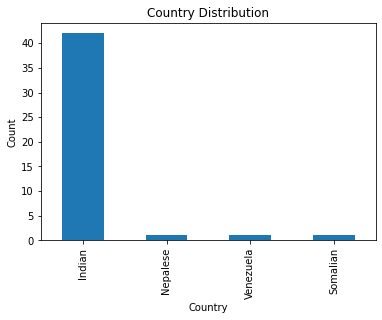

In [229]:
df1['NATIONALITY'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title("Country Distribution")

<AxesSubplot:xlabel='NATIONALITY,SEX'>

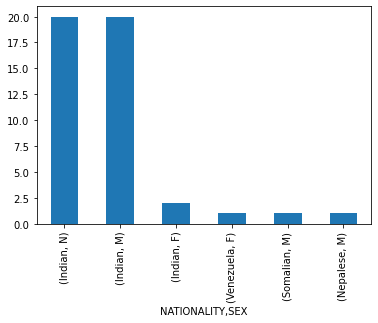

In [232]:
df1[['NATIONALITY','SEX']].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='NATIONALITY'>

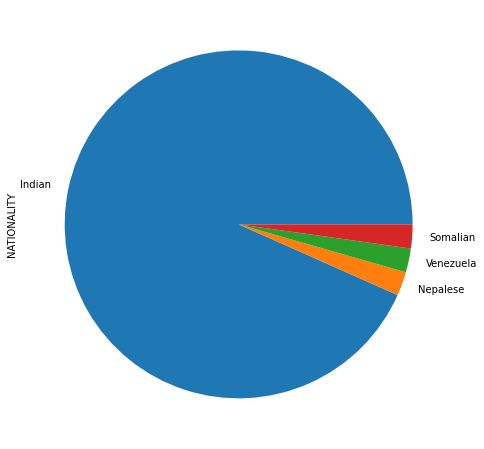

In [238]:
df1['NATIONALITY'].value_counts().plot(kind='pie',figsize=(8,8))

In [240]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [242]:
X=df1.drop(['SEX'],axis=1)
y=df1['SEX']

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<class 'datetime.date'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
